# Foreword

This Notebook allows to compute the mobility diversity, $H_X$, of travels made by travellers belonging to group $X \in \left\{ \text{men}, \text{women}, \text{all} \right\}$.

As in our study we used data from different sources (_i.e._, with a very heterogeneous formatting), we will consider a "_fake dataset_" containing exclusively the information relevant to compute the mobility diversity, $H$.


## Loading modules and setting figure appearance

In [1]:
import pandas as pd
import numpy as np
import math
import sys
import seaborn as sns
import os.path
import random

import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
from mpl_toolkits.axes_grid1 import make_axes_locatable
from itertools import combinations
from matplotlib import rcParams



rcParams['mathtext.fontset'] = 'custom'
rcParams['figure.figsize'] = (8,5)
rcParams['mathtext.it'] = 'Arial:italic'
rcParams['mathtext.rm'] = 'Arial'


# setting custom color palette to display data corresponding to gender-based groups
colors ={
    "all":"grey",
    "men":"#009E73",
    "women": "#E69F00"   
}

print('MODULES LOADED!')

MODULES LOADED!


## Loading the functions used to compute the mobility diversity

In [3]:
%load_ext autoreload
%autoreload 2

from MobilityDiversityFunctions import MobilityDiversityFunctions
mob = MobilityDiversityFunctions()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Defining a vector of destinations' IDs

We define here a variable containing **all the IDs** of the possible (available) destination zones in a given city. For instance, suppose to consider a city $A$ divided into 10 zones whose IDs span from $0$ to $9$. We define and initialise the vector of the zones' IDs as:

In [4]:
all_options = range(10)

## Generating the input data


We create a Pandas dataframe having the following columns:

* **Column 1**: the ID of the travel (int variable).
* **Column 2**: the expansion factor of the travel (int variable in the range $[0,100]$).
* **Column 3**: the ID of the destination zone of the travel (int variable in the range $[0,9]$).
* **Column 4**: the type of traveller (_i.e._, the group) performing such a travel (_e.g._, 'men').

**NOTE:** We are not including the ID of the travel's origin zone because we are computing the mobility diversity of the destinations only.

In [5]:
fake_data = pd.DataFrame([ [i, random.choice(range(1,100)), \
                            random.choice(range(1,10)), \
                            random.choice(['men','women'])]   for i in range(100)])
fake_data.columns = ['id','expansion_factor','locations','gender']
fake_data.head()

,id,expansion_factor,locations,gender
0,0,30,9,women
1,1,85,5,men
2,2,77,2,women
3,3,81,3,women
4,4,97,5,women


## Computing the mobility diversity

We compute now the mobility diversity of **all** the travellers regardless of their gender first, and of **men** and **women** only, then.

**NOTE:** Check the docstring of the function named "_calculate_mobility_diversity_fast_shuffling_int_expansion_factor_" available in the file "_MobilityDiversityFunctions.py_" for the details.

In [6]:
# initializing the data structure

mobility_diversity_values = {}


print('Computing the mobility diversity ...')

# Computing the mobility diversity of overall data
mobility_diversity_values["all"] = mob.calculate_mobility_diversity_fast_shuffling_int_expansion_factor(all_options, 
                                             data_group=fake_data,
                                             expansion_column='expansion_factor',
                                             destination_column='locations',
                                             percentage_sample=0.8, 
                                             simulations=30)


# Computing the mobility diversity for men and women travellers
for gender in ['men', 'women']:
    # Compute the mobility diversity of each group
    mobility_diversity_values[gender] = mob.calculate_mobility_diversity_fast_shuffling_int_expansion_factor(
                            all_options=all_options, 
                            data_group=fake_data[fake_data['gender']==gender],
                            expansion_column='expansion_factor',
                            destination_column='locations',
                            percentage_sample=0.8, 
                            simulations=30)
    
print('End of calculations!')

Computing the mobility diversity ...
End of calculations!


## Plotting the results

Here we generate the plot of the Kernel Density Estimators ($KDE$) of the mobility diversity, $H$, of each group of travellers (all, men, and women).

To this aim, we will use the function _kdeplot_ available through the _seaborn_ module.

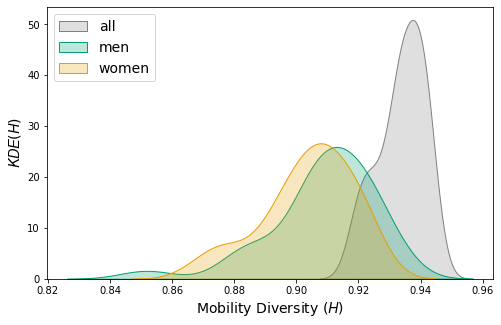

In [9]:
# plotting the data
for gender in ['all', 'men', 'women']:
    sns.kdeplot(mobility_diversity_values[gender], shade=True,\
                color=colors[gender], label=gender)
    
# customizing the plot appearance
plt.legend(fontsize=14, loc='upper left')
plt.xlabel(r"Mobility Diversity ($H$)", fontsize=14)
plt.ylabel(r"$KDE$($H$)", fontsize=14)
plt.show()